## Notebook Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
data = pd.read_csv('fish_data.csv')

data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Exporatory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


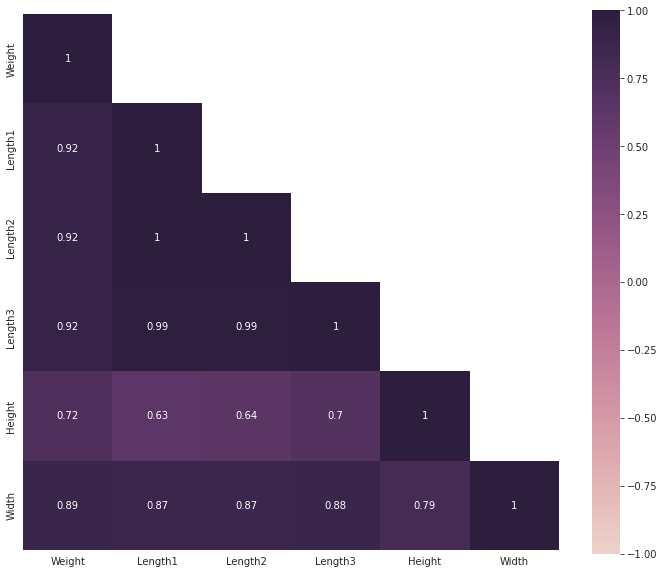

In [5]:
corr = data.corr()

color_map = sns.cubehelix_palette(as_cmap=True)

mask = np.ones_like(corr)

mask[np.tril_indices_from(mask)] = False

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(12, 10))

    ax = sns.heatmap(corr.round(decimals=2), mask=mask, vmax=1, vmin=-1, cmap=color_map, square=True, annot=True)

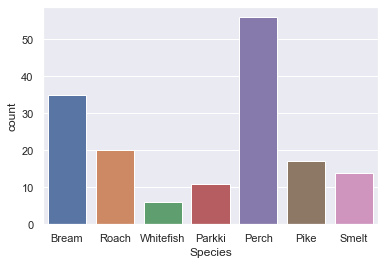

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(x = 'Species', data=data)
plt.show()

### Splitting the data

In [7]:
le = LabelEncoder()

X = data.iloc[:,1:]
y = le.fit_transform(data.iloc[:,0])


feature_names = np.array(X.columns)

In [8]:
le.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Train the models

In [10]:
# logistic regression classifier

lrc = LogisticRegression()

lrc.fit(X_train,y_train)

print('Accuracy of Logistic Regression Classifier :',lrc.score(X_test, y_test))

Accuracy of Logistic Regression Classifier : 0.725


In [11]:
# LightGBM classifier

lgbm = LGBMClassifier(boosting_type='dart', learning_rate=0.1, n_estimators=100)

lgbm.fit(X_train,y_train)

print('Accuracy of LightGBM Classifier :', lgbm.score(X_test,y_test))

Accuracy of LightGBM Classifier : 0.75


In [12]:
# xgboost classifier

xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, n_estimators=100)

xgb.fit(X_train,y_train)

print('Accuracy of XGBoost Classifier :', xgb.score(X_test,y_test))

Accuracy of XGBoost Classifier : 0.75


In [13]:
pickle_out = open("model.pkl","wb")
pickle.dump(lrc, pickle_out)
pickle_out.close()